In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import mglearn
from IPython.display import display

# Метод k ближайших соседей (knn)

### Классификация

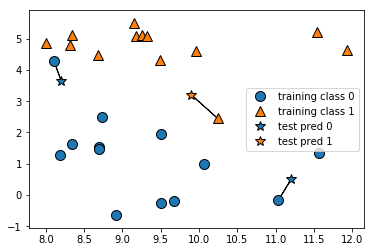

In [2]:
# иллюстрация метода 1 ближайшего соседа
mglearn.plots.plot_knn_classification(n_neighbors=1)

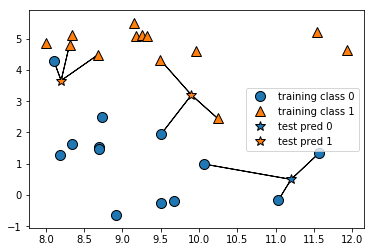

In [3]:
# иллюстрация метода 3 ближайших соседей
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [4]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [5]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [6]:
print("Прогнозы на тестовом наборе: {}".format(clf.predict(X_test)))
print("Правильность на тестовом наборе: {:.3f}".format(clf.score(X_test, y_test)))

correct_predictions = [x for x in list(range(len(y_test))) if clf.predict(X_test)[x] == y_test[x]]
print("Суть оценки праильности: {:.3f}".format(len(correct_predictions) / len(y_test)))

Прогнозы на тестовом наборе: [1 0 1 0 1 0 0]
Правильность на тестовом наборе: 0.857
Суть оценки праильности: 0.857


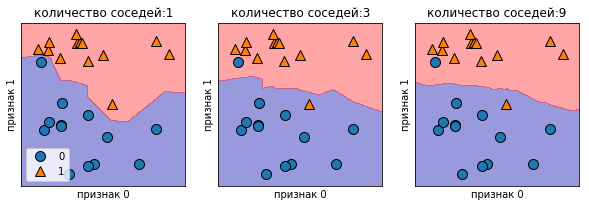

In [7]:
# рисуем границы принятия решений
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
# создаем объект-классификатор и подгоняем в одной строке
 clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
 mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
 mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
 ax.set_title("количество соседей:{}".format(n_neighbors))
 ax.set_xlabel("признак 0")
 ax.set_ylabel("признак 1")
axes[0].legend(loc=3)

На рисунке слева можно увидеть, что использование модели одного
ближайшего соседа дает границу принятия решений, которая очень
хорошо согласуется с обучающими данными. Увеличение числа соседей
приводит к сглаживанию границы принятия решений. Более гладкая
граница соответствует более простой модели. Другими словами,
использование нескольких соседей соответствует высокой сложности
модели (как показано в правой части рис. 2.1), а использование большого
количества соседей соответствует низкой сложности модели (как
показано в левой части рис. 2.1). Если взять крайний случай, когда
количество соседей будет равно количеству точек данных обучающего
набора, каждая точка тестового набора будет иметь одних и тех же
соседей (соседями будет все точки обучающего набора) и все прогнозы
будут одинаковыми: будет выбран класс, который является наиболее
часто встречающимся в обучающем наборе.

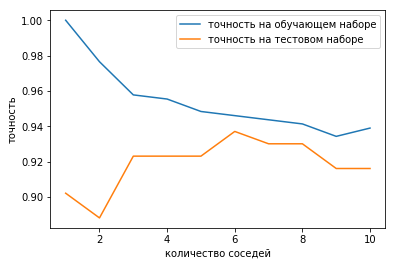

In [8]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []
# пробуем n_neighbors от 1 до 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
 # строим модель
 clf = KNeighborsClassifier(n_neighbors=n_neighbors)
 clf.fit(X_train, y_train)
 # записываем правильность на обучающем наборе
 training_accuracy.append(clf.score(X_train, y_train))
 # записываем правильность на тестовом наборе
 test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="точность на обучающем наборе")
plt.plot(neighbors_settings, test_accuracy, label="точность на тестовом наборе")
plt.ylabel("точность")
plt.xlabel("количество соседей")
plt.legend()

### Регрессия

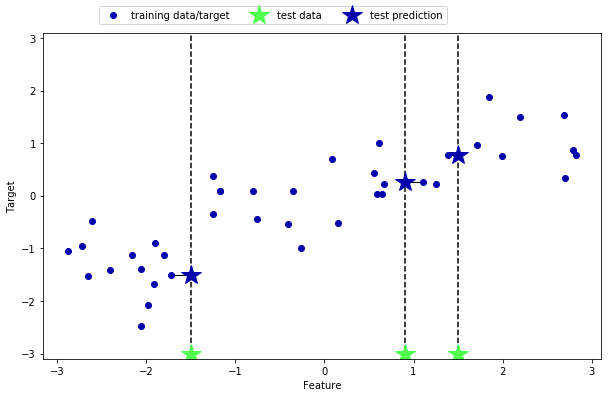

In [9]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

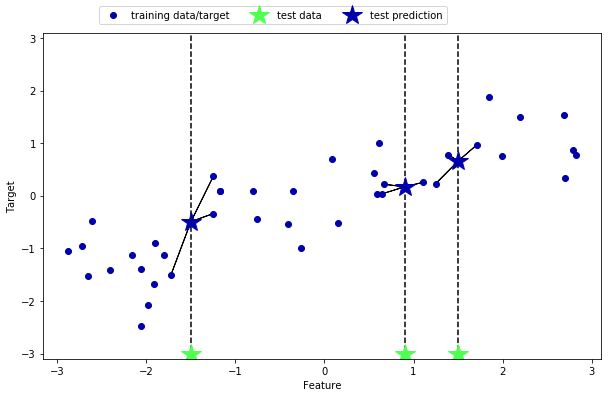

In [10]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [11]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
# разбиваем набор данных wave на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# создаем экземпляр модели и устанавливаем количество соседей равным 3
reg = KNeighborsRegressor(n_neighbors=3)
# подгоняем модель с использованием обучающих данных и обучающих ответов
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [12]:
print("Прогнозы для тестового набора:\n{}".format(reg.predict(X_test)))

Прогнозы для тестового набора:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [13]:
print("R^2 на тестовом наборе: {:.2f}".format(reg.score(X_test, y_test)))

R^2 на тестовом наборе: 0.83


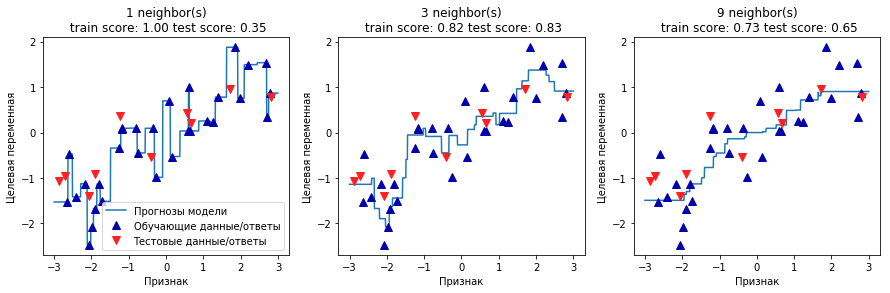

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# создаем 1000 точек данных, равномерно распределенных между -3 и 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
 # получаем прогнозы, используя 1, 3, и 9 соседей
 reg = KNeighborsRegressor(n_neighbors=n_neighbors)
 reg.fit(X_train, y_train)
 ax.plot(line, reg.predict(line))
 ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
 ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

 ax.set_title(
 "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
 n_neighbors, reg.score(X_train, y_train),
 reg.score(X_test, y_test)))
 ax.set_xlabel("Признак")
 ax.set_ylabel("Целевая переменная")
axes[0].legend(["Прогнозы модели", "Обучающие данные/ответы",
 "Тестовые данные/ответы"], loc="best")

# Линейные модели

### Линейные модели для регрессии

Для регрессии общая прогнозная формула линейной модели выглядит
следующим образом:

y' = w[0] * x[0] + w[1] + x[1] + ... + w[p] + x[p] + b

Здесь х[0] по х[р] обозначают признаки (в данном примере число
характеристик равно р+1) для отдельной точки данных, w и b –
параметры модели, оцениваемые в ходе обучения, и y' – прогноз, 
выдаваемый моделью. Для набора данных с одним признаком эта
формула имеет вид:

y' = w[0] * x[0] + b